<a href="https://colab.research.google.com/github/BerryStorm/fractal/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Essence of Fractal Geometry

Self-similar sets, self-affine sets, and more.

---
---

Made by Stanley Salim and supervised by Prokaj Rudolf Dániel

### List of Contents

0. Before We Begin
1. From an Intuitive Motivation
2. More on Self-Similar Sets
3. More on Self-Affine Sets
4. More on IFS
5. ...

---

## 0. Before We Begin

This is an interactive notebook about brief introduction to fractal geometry dedicated as an undergraduate individual research project. Although this explainer can be understood without having a very deep knowledge, it is always helpful to have the following background under our belt in order to have the fullest understanding about the topic:

1. Set Theory
2. Linear Algebra
3. Measure Theory
4. Analytic Geometry
5. Python Programming (optional)

The plan is to walk simultaneously through theoretical ideas given by the **markdown cells** alongside with bunch of examples and visualisation given by the **code cells**. Note that the notebook can be understood solely without any programming background. But for those who has even just a tiny bit of programming background, typically with Python, several code lines will have comments that indicate customisable parameters to play around with. Source codes are also available in the created [package](https://github.com/BerryStorm/fractal/tree/main/fractalpackage) on the [GitHub](https://github.com/BerryStorm/fractal) page.

> Please note that this notebook is created using Colaboratory (and it is FREE), so it is recommended to use this platform, since some codes might not be compatible with some other Jupyter runners!

Happy reading!

---

## 1. From an Intuitive Motivation

We start off from a simple motivation and move on to a more rigorous math as the note grows.

<img src="https://github.com/BerryStorm/fractal/blob/main/img/headland.jpg?raw=1" alt="headland" width="33%"/>
<img src="https://github.com/BerryStorm/fractal/blob/main/img/tree.jpg?raw=1" alt="tree" width="33%"/>
<img src="https://github.com/BerryStorm/fractal/blob/main/img/frost.jpg?raw=1" alt="frost" width="33%"/>

Consider a piece of paper. On our human scale level, we see that the surface of a paper feels and looks smooth. But imagine zooming the paper to a microscopic scale, and we can guess that the surface of a paper is actually pretty rough. If our physical body is shrunk down to a considerably small scale level and we stand on the surface of the paper, it is most likely that the surface is not really flat and smooth, but rather wavy and fabricated.

This somehow gives us an idea that almost every object that we can see is "rough". And in mathematics, we want to make sure what we mean by roughness precisely. This raises the idea of finding some other objects that are, in some sense, not necessarily smooth. And some of the most interesting instance of these are the so called "fractals", whatever that mean. The pictures that we see in the beginning of this note are some real-life examples of these "fractals", but we will make it clear what we mean by that soon.

### Motivating Example: Sierpiński Triangle

To quickly understand what a fractal is, let's just construct one such. But before that, we need to lay some groundwork that is essential for the visualisation.

First, we copy the online repository that stores everything we need by running the following line of code.

In [1]:
%rm -r fractal
!git clone https://github.com/BerryStorm/fractal.git

Cloning into 'fractal'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 235 (delta 63), reused 0 (delta 0), pack-reused 138
Receiving objects: 100% (235/235), 21.43 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (124/124), done.


Next, we set up a path in order to find the required packages with the following code.

In [2]:
import sys
sys.path.insert(0,'/content/fractal')

Finally, we import the package we need.

In [3]:
import fractalpackage.sierpinski as sier

Now we are all set! Here are the steps to construct one fractal:

1. Start with an equilateral triangle (of unit side length).

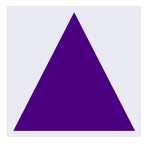

In [4]:
sier.step1(sier.sbase)

2. Now comes the main step. Imagine taking three copies of this triangle and shrink them down into triangles with half the unit side length. Then, we place them at the vertices of the original triangle we start with.

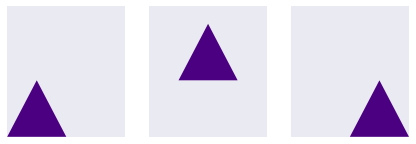

In [5]:
sier.step2(sier.sbase)

3. Instead of drawing three of them separately, let's keep them in one frame. This might sound simple, but this is actually very crucial in the definition of a fractal.

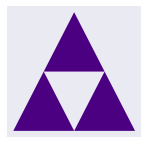

In [6]:
sier.step3(sier.sbase)

4. What we have now is a shape whose each of the three triangles is similar with the original triangle in the beginning. In the next step, we repeat the procedure from step 2 and step 3 to each of these three smaller triangles (treated similarly as step 1).

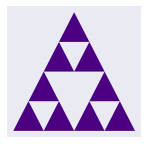

In [7]:
sier.step4(sier.sbase)

Time for some experiment! The following is a code representing the first $n$ iterations of the process mentioned above. The parameter `n` in the first line indicates the number of level to be done. Change the number `4` into any other (small) positive integers to see several initial iterations of the construction.

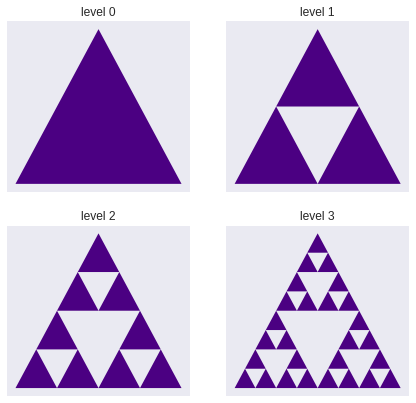

In [8]:
n = 4    # Try changing 4 into 8 and wait for the magic.

sier.splot(sier.sbase, n)

What we have seen above is the $n$-th approximation of the so-called Sierpiński Triangle. Doing this iteration infinitely many times give the exact fractal, and it is one of the best-known fractal in the world. Now we are going to use our example to introduce some mathematical notions to be able to talk about fractals more rigorously.

### Defining Self-Similar Sets

Each iteration of the process of approximating the Sierpiński Triangle is also called a **level**, and we call each triangle in any level of the Sierpiński Triangle by a **cylinder**. So for example, in step 1, the triangle that we started with is called the **base cylinder** or level-0 cylinder.

In step 2, we introduce three level-1 cylinders, and these are the images of three different mappings on the Euclidean plane. If $\vec{x}=\begin{bmatrix}x_1\\x_2\end{bmatrix}$ is a vector on $\Bbb{R}^2$, then the three maps are defined to be

$$\begin{eqnarray}
S_1(\vec{x})&:=&\frac{1}{2}\cdot \vec{x}\\
S_2(\vec{x})&:=&\frac{1}{2}\cdot \vec{x} + \begin{bmatrix}1/4\\\sqrt{3}/4\end{bmatrix}\\
S_3(\vec{x})&:=&\frac{1}{2}\cdot \vec{x} + \begin{bmatrix}1/2\\0\end{bmatrix}
\end{eqnarray}$$


The map $S_1$ gives the lower-left triangle by scaling the original triangle by a factor of $\frac{1}{2}$. This factor is called a **contraction ratio**. The map $S_2$ gives the upper-mid triangle by shifting the image of $S_1$ (i.e. the lower-left triangle) to the right by $\frac{1}{4}$ and up by $\frac{\sqrt{3}}{4}$. The map $S_3$ gives the lower-right triangle by shifting the image of $S_1$ to the right by $\frac{1}{2}$. Each of these linear maps is called a contracting similarity transformation or **contraction** for shorthand.

Jumping to step 4, we apply the same maps for each of the level-1 cylinders to get the level-2 cylinders. In other words, each of the level-2 cylinder we get in step 4 is an image of a unique composition of the contractions $S_1, S_2, S_3$. This motivates us to introduce a simplified notation

$$S_{i_1}\circ S_{i_2}\circ \ldots \circ S_{i_n} =: S_{i_1 i_2 \ldots i_n}$$

Now looking back at step 3, We took the union of the images of $S_1, S_2, S_3$, written as 

$$S_1\cup S_2\cup S_3$$

and created the level-1 Sierpiński Triangle. Similarly in step 4, we create the level-2 Sierpiński Triangle by taking the union of the images of $S_{ij}$ for each $i,j=1,2,3$, written as 

$$\bigcup_{i,j=1}^3 S_{ij}$$

We can think of Sierpiński Triangle as considering every level of cylinders (made from step 1, 2, 4, and so on) and taking the intersection of all of them. Hence in general, The remaining set $\Lambda$ of points after infinitely many iterations can be written as

$$\Lambda := \bigcap_{n=1}^\infty \bigcup_{(i_1i_2\ldots i_n)\in \{1,2,3\}^n} S_{i_1 i_2 \ldots i_n}(\vec{x})$$

This set $\Lambda$ is finally what we call an **attractor**, and this is exactly the Sierpiński Triangle that we are talking about all this time. And by the nature of self-similarness:

$$\Lambda = S_1(\Lambda) \cup S_2(\Lambda) \cup S_3(\Lambda)$$

we can say that the Sierpiński Triangle is **self-similar**. And from now on, we call the collection of our mappings $(S_1, S_2, S_3)$ a self-similar iterated function system or just **IFS**.

> The the IFS of the Sierpiński Triangle in action can be seen from the raw Python code inside the handmade GitHub library [fractalpackage/sierpinski](https://github.com/BerryStorm/fractal/blob/main/fractalpackage/sierpinski.py). The map $S_1$ corresponds to the function `sf1`, the map $S_2$ corresponds to the function `sf2`, etc.

That was quite a lot of definitions! Meeting them can be quite puzzling for the first time. So later on, we will see bunch of other examples to illustrate all these notions in action.

---

## More on Self-Similar Sets

Another famous fractal that we are going to examine is the Cantor set.

### The Middle-thirds Cantor Set

As in the previous case, we first need to import the package for visualising this fractal.

In [9]:
import fractalpackage.cantor as cant

Now the following code represents the first $n$ iterations of the construction of the Cantor set. The parameter `n` in the first line indicates the number of level to be done. Feel free to play around with it.

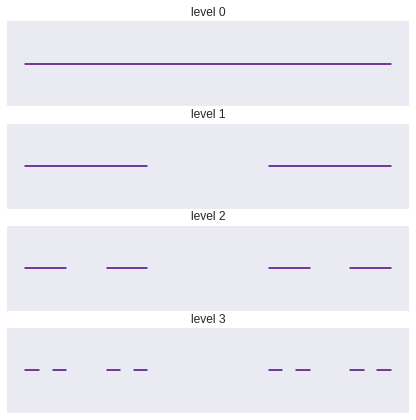

In [10]:
n = 4    # Try changing 4 into 8 and wait for the magic.

cant.cplot(cant.cbase, n)

---

## 3. More on Self-Affine Sets

### The Koch Curve

In [11]:
import fractalpackage.koch as koch


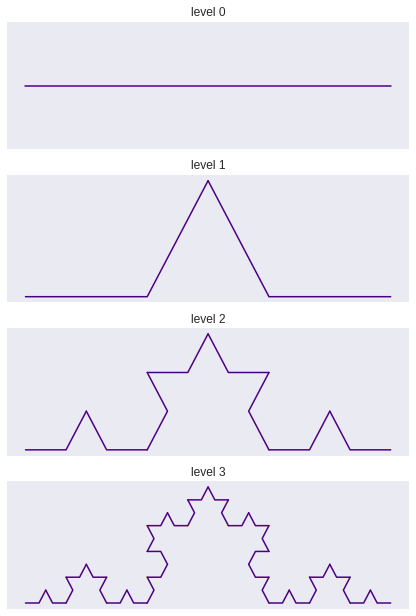

In [12]:
n = 4    # Try changing 4 into 8 and wait for the magic.

koch.kplot(koch.kbase, n)

---

## 4. More on IfS

#### The Heighway Dragon

In [13]:
import fractalpackage.dragon as drag

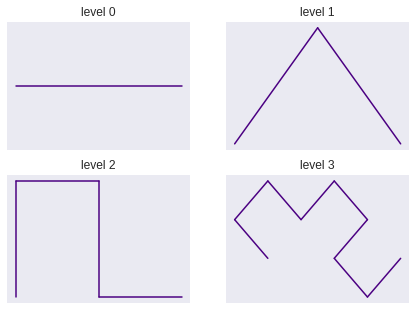

In [14]:
n = 4    # Try changing 4 into 8 and wait for the magic.

drag.dplot(drag.dbase, n)

---
---

## References

1. Balázs Bárány, Károly Simon, & Boris Solomyak (Forthcoming 2022). Self-Similar and Self-Affine Sets and Measures.
2. Michael Keane, Károly Simon, & Boris Solomyak (2003). The dimension of graph directed attractors with overlaps on the line, with an application to a problem in fractal image recognition. Fundamenta Mathematicae, 180.

---

## EX. Coming Soon

- Well-Separated VS Overlapping Cylinders
- Graph Directed Iterated Function Systems
- ...

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import sympy
import math